In [13]:
import sys
import os 
sys.path.append(os.path.join('..'))
from Graph_Generation.src.network_gen import NetworkDatabase
import networkx as nx
from datetime import datetime
import pickle
import gzip
from Graph_Generation.utils.logger import info
from typing import Dict 

In [ ]:

# Instantiate the database manager
db = NetworkDatabase()

# Get a network. This single call handles all the complex logic
# of loading, validating, or creating a new one.
bay_area_road_network = db.load_or_create_network()

# The result is a NetworkX graph object, ready for routing
print(f"Network is ready with {len(bay_area_road_network.nodes())} nodes.")

2025-10-10 12:57:20,619 - ev_fleet.road_network_db - INFO - info:111 - 🔨 Creating new New York road network...
2025-10-10 12:57:20,619 - ev_fleet.road_network_db - INFO - info:111 - 🧩 Creating chunked bbox network for New York State...
2025-10-10 12:57:20,619 - ev_fleet.road_network_db - INFO - info:111 - 📍 Loading chunk 1/5: NYC Metro Area
2025-10-10 13:00:08,034 - ev_fleet.road_network_db - INFO - info:111 -   ✅ NYC Metro Area: 290830 nodes
2025-10-10 13:00:13,987 - ev_fleet.road_network_db - INFO - info:111 -   🔗 Total merged: 290830 nodes (1 chunks)
2025-10-10 13:00:13,987 - ev_fleet.road_network_db - INFO - info:111 - 📍 Loading chunk 2/5: Hudson Valley & Capital Region


c:\Users\YODA\AppData\Local\pypoetry\Cache\virtualenvs\ev-energy-optimization-SsceYLpY-py3.12\Lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


2025-10-10 13:03:39,151 - ev_fleet.road_network_db - INFO - info:111 -   ✅ Hudson Valley & Capital Region: 207047 nodes
2025-10-10 13:03:41,542 - ev_fleet.road_network_db - WARNING - warning:116 -   ❌ Hudson Valley & Capital Region: failed - The node sets of the graphs are not disjoint.
Use `rename` to specify prefixes for the graphs or use
disjoint_union(G1, G2, ..., GN).
2025-10-10 13:03:41,807 - ev_fleet.road_network_db - INFO - info:111 - 📍 Loading chunk 3/5: Central New York


c:\Users\YODA\AppData\Local\pypoetry\Cache\virtualenvs\ev-energy-optimization-SsceYLpY-py3.12\Lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 14 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


2025-10-10 13:11:21,673 - ev_fleet.road_network_db - INFO - info:111 -   ✅ Central New York: 78855 nodes
2025-10-10 13:11:30,907 - ev_fleet.road_network_db - INFO - info:111 -   🔗 Total merged: 369685 nodes (2 chunks)
2025-10-10 13:11:30,907 - ev_fleet.road_network_db - INFO - info:111 - 📍 Loading chunk 4/5: Western New York


c:\Users\YODA\AppData\Local\pypoetry\Cache\virtualenvs\ev-energy-optimization-SsceYLpY-py3.12\Lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


2025-10-10 13:20:43,053 - ev_fleet.road_network_db - INFO - info:111 -   ✅ Western New York: 117676 nodes
2025-10-10 13:20:50,006 - ev_fleet.road_network_db - INFO - info:111 -   🔗 Total merged: 487361 nodes (3 chunks)
2025-10-10 13:20:50,006 - ev_fleet.road_network_db - INFO - info:111 - 📍 Loading chunk 5/5: North Country


c:\Users\YODA\AppData\Local\pypoetry\Cache\virtualenvs\ev-energy-optimization-SsceYLpY-py3.12\Lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 16 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


2025-10-10 13:25:37,888 - ev_fleet.road_network_db - INFO - info:111 -   ✅ North Country: 44061 nodes
2025-10-10 13:25:47,123 - ev_fleet.road_network_db - WARNING - warning:116 -   ❌ North Country: failed - The node sets of the graphs are not disjoint.
Use `rename` to specify prefixes for the graphs or use
disjoint_union(G1, G2, ..., GN).
2025-10-10 13:25:47,592 - ev_fleet.road_network_db - INFO - info:111 - 🎯 Chunked network complete: 487361 nodes from 3 chunks
2025-10-10 13:25:56,935 - ev_fleet.road_network_db - INFO - info:111 - 🔗 Largest connected component: 284044 nodes
2025-10-10 13:25:56,935 - ev_fleet.road_network_db - INFO - info:111 - Adding edge speeds and travel times...
2025-10-10 13:26:15,420 - ev_fleet.road_network_db - INFO - info:111 - Successfully added network attributes
2025-10-10 13:26:30,701 - ev_fleet.road_network_db - INFO - info:111 - ✅ Network is already fully connected
2025-10-10 13:26:30,998 - ev_fleet.road_network_db - INFO - info:111 - ✅ Chunked bbox succe

In [8]:
metadata = {
                'source': 'osm' if hasattr(bay_area_road_network, 'graph') and 'crs' in bay_area_road_network.graph else 'mock',
                'new_york_state_bounds': True,
                'connectivity_enhanced': True,
                'creation_method': 'comprehensive_new_york',
                'nodes_count': len(bay_area_road_network.nodes),
                'edges_count': len(bay_area_road_network.edges)
            }

In [10]:
def save_network( network: nx.MultiDiGraph, metadata: Dict = None):
        """Save network to compressed pickle file"""
        info(f"Saving network to New_York_network_ny.pkl.gz", 'road_network_db')
        
        data = {
            'network': network,
            'metadata': metadata or {},
            'created_at': datetime.now().isoformat(),
            'nodes_count': len(network.nodes),
            'edges_count': len(network.edges)
        }
        
        with gzip.open("New_York_network_ny.pkl.gz", 'wb') as f:
            pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)
        
        info(f"Network saved: {len(network.nodes)} nodes, {len(network.edges)} edges", 'road_network_db')

In [11]:
save_network(bay_area_road_network, metadata)

2025-10-10 20:24:22,475 - ev_fleet.road_network_db - INFO - info:111 - Saving network to New_York_network_ny.pkl.gz
2025-10-10 20:24:40,513 - ev_fleet.road_network_db - INFO - info:111 - Network saved: 284044 nodes, 733178 edges


In [ ]:
import gzip
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox
    
# Path to your file
file_path = "New_Yrok_network_ny.pkl.gz"

# Load the graph
with gzip.open(file_path, "rb") as f:
    G = pickle.load(f)

# Get the graph from the network key
graph = G["network"]

# Print basic network statistics
print("Network Statistics:")
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")

FileNotFoundError: [Errno 2] No such file or directory: 'New_York_network_ny.pkl.gz'

CPU times: total: 0 ns
Wall time: 0 ns


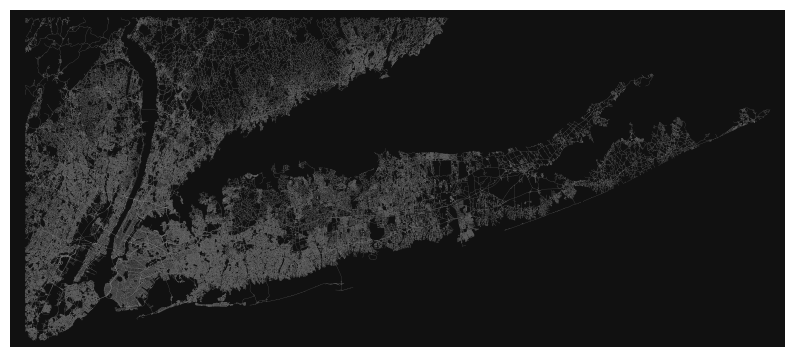

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [15]:
%time
ox.plot_graph(graph, node_size=0.01, edge_linewidth=0.05,figsize=(10, 10))

In [25]:
import networkx as nx
from Graph_Generation.src.network_gen import NetworkDatabase

# This will load a pre-existing network or create a new one.
# This is a one-time setup cost.
network_manager = NetworkDatabase()
city_network = network_manager.load_network()
# Define start and end coordinates for a trip
start_coords = (41.148, -73.279) # Downtown SF
end_coords = (40.6046, -73.9819)   # Palo Alto

# Find the closest nodes in your graph to these real-world coordinates
start_node = network_manager._find_nearest_node(start_coords[0], start_coords[1])
end_node = network_manager._find_nearest_node(end_coords[0], end_coords[1])

# Calculate the shortest path based on travel time
shortest_route_nodes = nx.shortest_path(city_network,
                                       source=start_node,
                                       target=end_node,
                                       weight='travel_time')

# Now, convert this list of nodes into a GPS trace
# This requires additional logic to create timestamps and speeds,
# but the foundation is this list of nodes.

2025-10-10 21:00:19,935 - ev_fleet.road_network_db - INFO - info:111 - Loading network from New_York_network_ny.pkl.gz
2025-10-10 21:00:27,472 - ev_fleet.road_network_db - INFO - info:111 - Network loaded: 284044 nodes, 733178 edges
2025-10-10 21:00:27,473 - ev_fleet.road_network_db - INFO - info:111 - Created: 2025-10-10T20:24:22.476072


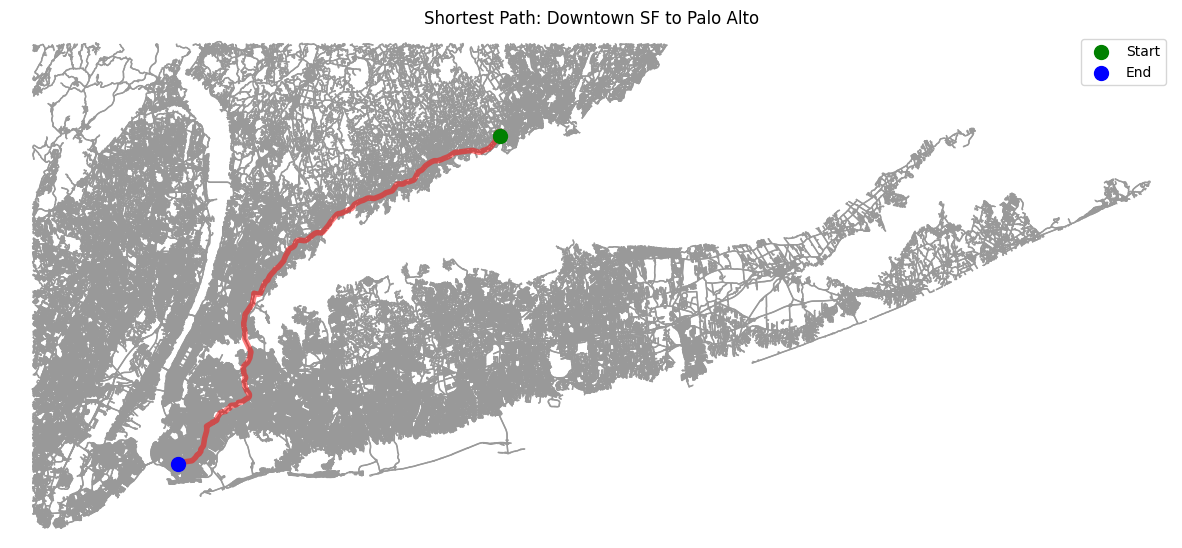

In [26]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# --- Assume these variables are defined and populated from your code ---
# city_road_network (your NetworkX graph)
# shortest_route_nodes (the list of node IDs you provided)
# --------------------------------------------------------------------

# Note: If your graph was not loaded with OSMnx, you must ensure
#       each node in city_road_network has 'x' (longitude) and 'y' (latitude) attributes.

# 1. Use OSMnx to plot the graph and highlight the route
#    This will draw the full road network with the shortest path overlaid.
fig, ax = ox.plot.plot_graph_route(
    G=city_network,
    route=shortest_route_nodes,
    route_color='r',       # Color the route red
    route_linewidth=4,     # Make the line thick
    node_size=0,           # Don't show individual nodes
    bgcolor='w',           # White background
    save=False,            # Don't save to file yet
    filepath=None,
    #return_fig_ax=True,
    show=False,
    close=False,
    figsize=(15,15)
)

# 2. Highlight the start and end points for clarity
#    a. Get the coordinates for the start and end nodes
start_node = shortest_route_nodes[0]
end_node = shortest_route_nodes[-1]

start_lon = city_network.nodes[start_node]['x']
start_lat = city_network.nodes[start_node]['y']
end_lon = city_network.nodes[end_node]['x']
end_lat = city_network.nodes[end_node]['y']

#    b. Plot the start and end points
ax.scatter(start_lon, start_lat, c='green', s=100, zorder=3, label='Start')
ax.scatter(end_lon, end_lat, c='blue', s=100, zorder=3, label='End')

# 3. Finalize and Display the plot
plt.title("Shortest Path: Downtown SF to Palo Alto")
plt.legend()
plt.show()
